In [1]:
import numpy as np
import pandas as pd 
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

import os
print(os.listdir("../input"))

import zipfile

with zipfile.ZipFile("../input/dogs-vs-cats/train.zip","r") as z:
    z.extractall(".")
    
with zipfile.ZipFile("../input/dogs-vs-cats/test1.zip","r") as z:
    z.extractall(".")

['dogs-vs-cats']


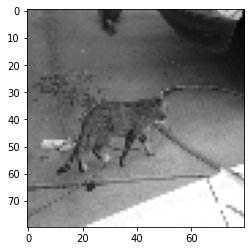

In [2]:
main_dir = "/kaggle/working/"
train_dir = "train"
path = os.path.join(main_dir,train_dir)

for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [3]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(150, 150))
        X.append(new_img_array)
        y.append(category)

In [4]:
create_test_data(path)
X = np.array(X).reshape(-1, 150,150,1)
y = np.array(y)

In [5]:
X = X/255.0

In [6]:
model = Sequential()

model.add(Conv2D(128,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(32,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(16,(3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        73792     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 31, 31, 64)        3

In [7]:
model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy",
    metrics = ["accuracy"]

)

In [8]:
 history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 22s 36ms/step - loss: 0.6934 - accuracy: 0.5062 - val_loss: 0.6934 - val_accuracy: 0.4934
Epoch 2/20
625/625 [==============================] - 21s 34ms/step - loss: 0.6932 - accuracy: 0.4983 - val_loss: 0.6932 - val_accuracy: 0.4934
Epoch 3/20
625/625 [==============================] - 21s 34ms/step - loss: 0.6932 - accuracy: 0.4996 - val_loss: 0.6932 - val_accuracy: 0.4934
Epoch 4/20
625/625 [==============================] - 21s 34ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4934
Epoch 5/20
625/625 [==============================] - 21s 34ms/step - loss: 0.6932 - accuracy: 0.4974 - val_loss: 0.6932 - val_accuracy: 0.4934
Epoch 6/20
625/625 [==============================] - 21s 34ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6934 - val_accuracy: 0.4934
Epoch 7/20
625/625 [==============================] - 21s 34ms/step - loss: 0.6932 - accuracy: 0.4985 - val_loss: 0.6933 - val_accuracy:

In [9]:
train_dir = "test1"
path = os.path.join(main_dir,train_dir)
#os.listdir(path)

X_test = []
id_line = []
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(150, 150))
        X_test.append(new_img_array)
create_test1_data(path)
X_test = np.array(X_test).reshape(-1,150,150,1)
X_test = X_test/255

In [10]:
predictions = model.predict(X_test)

In [11]:
predicted_val = [int(round(p[0])) for p in predictions]

In [12]:
submission_df = pd.DataFrame({'id':id_line, 'label':predicted_val})

In [13]:
submission_df.to_csv("submission.csv", index=False)